In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

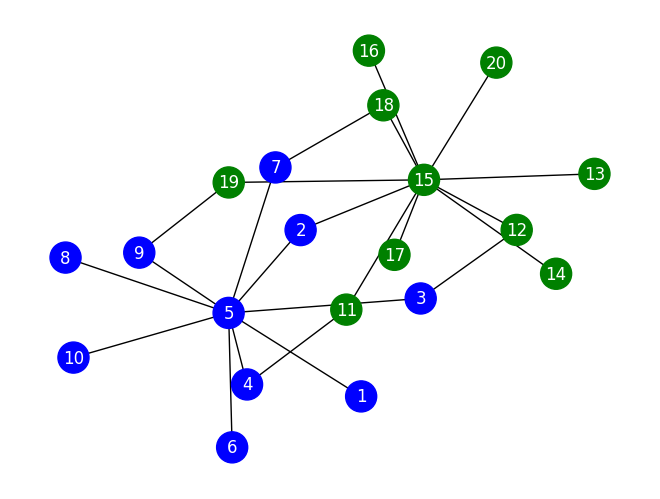

In [5]:
# Create a graph
G = nx.Graph()

# Add nodes 1 to 20
G.add_nodes_from(range(1, 21))

# Add edges for node 5
edges_5 = [(5, i) for i in [1, 2, 3, 4, 6, 7, 8, 9, 10]]
G.add_edges_from(edges_5)

# Add edges for node 15
edges_15 = [(15, i) for i in [11, 12, 13, 14, 16, 17, 18, 19, 20]]
G.add_edges_from(edges_15)

# Add some connections between the two sub-networks
cross_edges = [(3, 12), (7, 18), (2, 15), (9, 19), (4, 11)]  # Sample cross-connections
G.add_edges_from(cross_edges)

# Color nodes: first 10 nodes blue, next 10 nodes green
node_colors = ['blue' if node <= 10 else 'green' for node in G.nodes]

# Draw the graph with color
pos = nx.spring_layout(G)  # Positioning the nodes
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_color='white')

# Show the graph
plt.show()


---

In [10]:

def simulate_message_spread(graph, start_nodes):
    # Set of nodes where the message will be spread
    visited_nodes = set()

    # For each node in the start list, do a BFS/DFS to propagate the message
    for node in start_nodes:
        if node not in visited_nodes:
            # Get all reachable nodes from the start node
            reachable_nodes = nx.node_connected_component(graph, node)
            # Add these nodes to the visited set
            visited_nodes.update(reachable_nodes)

    return visited_nodes

In [11]:
reached_nodes = simulate_message_spread(G, [5, 15])
print("Nodes reached by message:", reached_nodes)


Nodes reached by message: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}


---

In [6]:

def simulate_message_spread(graph, start_nodes):
    visited_nodes = set()
    nodes_by_step = []

    for node in start_nodes:
        if node not in visited_nodes:
            reachable_nodes = nx.node_connected_component(graph, node)
            new_nodes = reachable_nodes - visited_nodes
            visited_nodes.update(reachable_nodes)
            nodes_by_step.append(new_nodes)
    
    return nodes_by_step

def update(num, graph, pos, nodes_by_step, ax, node_colors):
    ax.clear()
    
    # Draw nodes that are yet to be reached
    nx.draw(graph, pos, node_color=node_colors, with_labels=True, ax=ax, node_size=500)
    
    # Highlight nodes reached in this step
    reached_nodes = set()
    for i in range(num + 1):
        reached_nodes.update(nodes_by_step[i])
    
    # Set color of reached nodes
    reached_colors = ['green' if node in reached_nodes else 'lightblue' for node in graph.nodes()]
    nx.draw(graph, pos, node_color=reached_colors, with_labels=True, ax=ax, node_size=500)

def animate_spread(graph, start_nodes):
    nodes_by_step = simulate_message_spread(graph, start_nodes)

    fig, ax = plt.subplots(figsize=(6, 6))
    pos = nx.spring_layout(graph)  # Positioning the nodes
    node_colors = ['lightblue'] * len(graph.nodes())
    
    ani = animation.FuncAnimation(
        fig, update, frames=len(nodes_by_step), fargs=(graph, pos, nodes_by_step, ax, node_colors),
        interval=1000, repeat=False
    )
    
    plt.show()

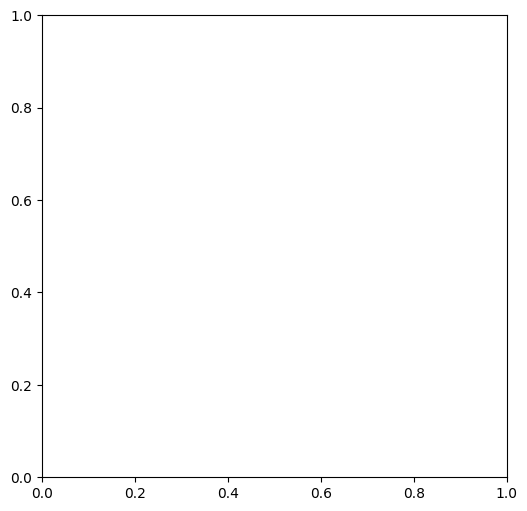

d:\study\final year project\.venv\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [7]:
animate_spread(G, [5, 15])

---

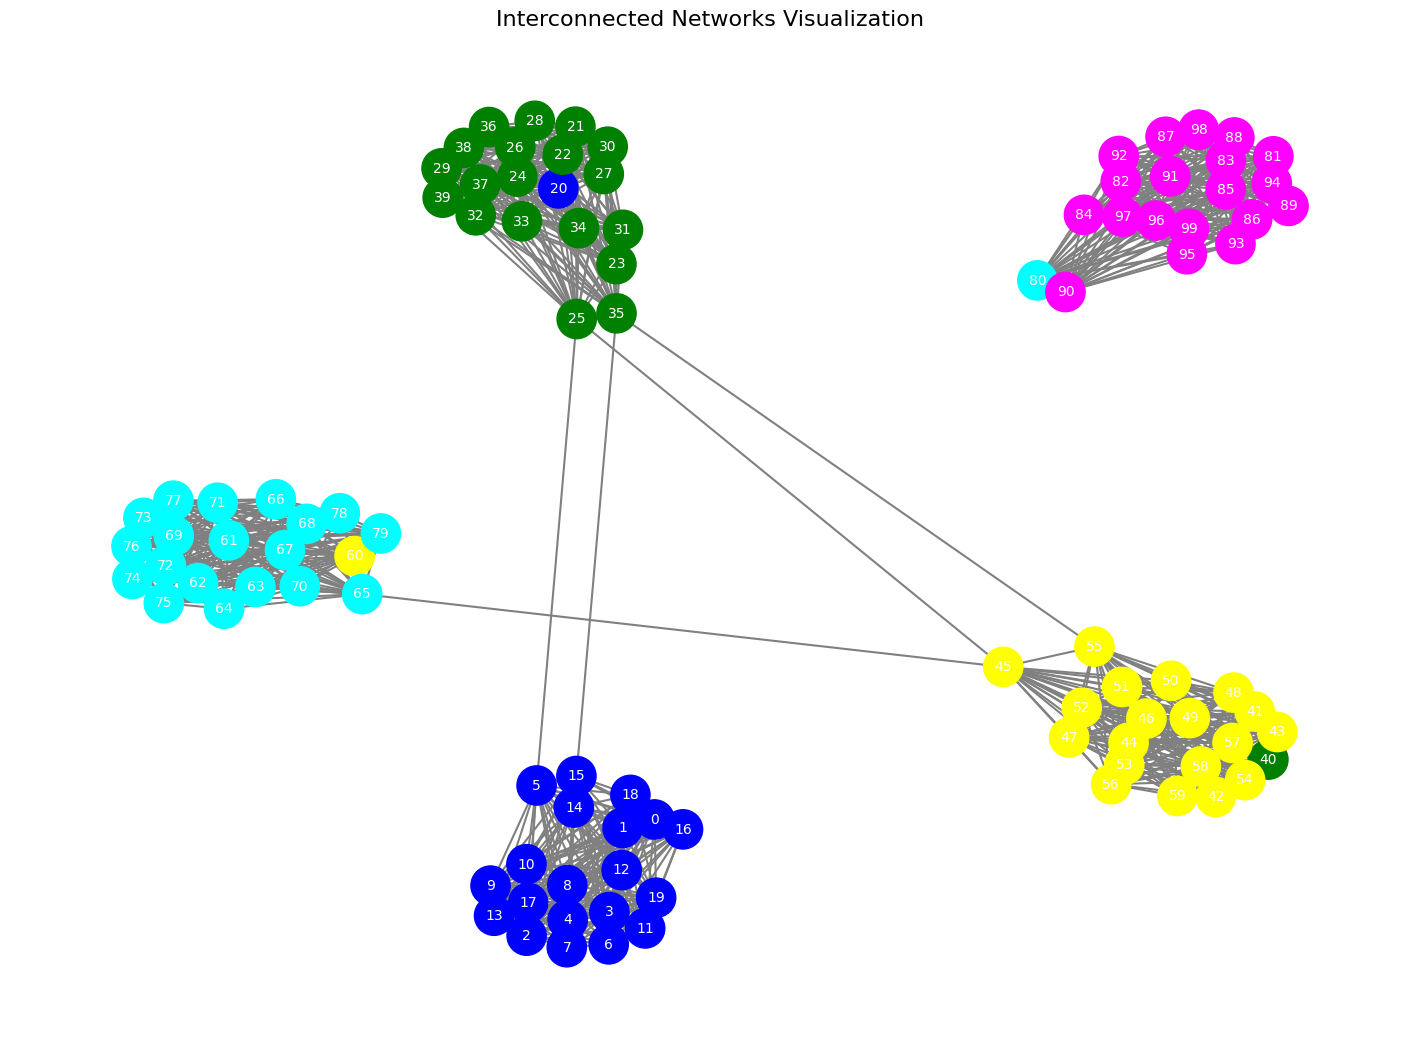

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to create a network with a specific base number
def create_network(base):
    G = nx.Graph()
    # Add nodes
    G.add_nodes_from(range(base, base + 20))
    
    # Connect node base + 5 with multiple edges within the group
    for i in range(base, base + 20):
        if i != base + 5:
            G.add_edge(base + 5, i)
    
    # Connect node base + 15 with multiple edges within the group
    for i in range(base, base + 20):
        if i != base + 15:
            G.add_edge(base + 15, i)

    # Add more connections within the network
    for i in range(base, base + 20):
        for j in range(i + 1, base + 20):
            if i != j:
                G.add_edge(i, j)  # Fully connect each network

    return G

# Create the main graph
G_total = nx.Graph()

# Create and connect four networks
for i in range(5):
    network = create_network(i * 20)
    G_total = nx.compose(G_total, network)

# Add connections between the networks
connections = [(5, 25), (15, 35), (25, 45), (35, 55), (45, 65)]  # Connect main nodes of each network
G_total.add_edges_from(connections)

# Color nodes: first 20 nodes blue, next 20 green, next 20 red, next 20 cyan, next 20 magenta
node_colors = []
for node in G_total.nodes:
    if node < 21:
        node_colors.append('blue')
    elif node < 41:
        node_colors.append('green')
    elif node < 61:
        node_colors.append('yellow')
    elif node < 81:
        node_colors.append('cyan')
    else:
        node_colors.append('magenta')

# Draw the graph with better visibility and more spread out
pos = nx.spring_layout(G_total, k=0.5, iterations=50)  # Use a spring layout for better spread
plt.figure(figsize=(14, 10))  # Increase figure size for better spread
nx.draw(G_total, pos, with_labels=True, 
        node_color=node_colors, 
        node_size=800,           # Node size
        font_size=10,           # Font size
        font_color='white',
        edge_color='gray',      # Edge color
        width=1.5)              # Edge width

# Show the graph
plt.title("Interconnected Networks Visualization", fontsize=16)
plt.show()
